--2022-06-02 09:05:13--  https://www.mapress.com/public/journals/1/submission_44433_67271_coverImage_en_US.jpg
Resolving www.mapress.com (www.mapress.com)... 140.82.21.59
Connecting to www.mapress.com (www.mapress.com)|140.82.21.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24327 (24K) [image/jpeg]
Saving to: ‘submission_44433_67271_coverImage_en_US.jpg.15’

submission_44433_67 100%[===================>]  23.76K  --.-KB/s    in 0.1s    

2022-06-02 09:05:14 (162 KB/s) - ‘submission_44433_67271_coverImage_en_US.jpg.15’ saved [24327/24327]



Text(0.5, 1.0, 'Entropy')

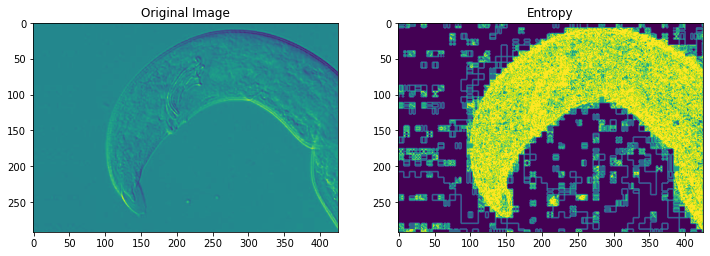

In [90]:
!wget https://www.mapress.com/public/journals/1/submission_44433_67271_coverImage_en_US.jpg

import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
from matplotlib import pyplot as plt
from scipy import ndimage as nd



img = cv2.imread('submission_44433_67271_coverImage_en_US.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
entropy_img = entropy(img, disk(1))

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(entropy_img)
plt.title('Entropy')

Text(0.5, 1.0, 'Sobel')

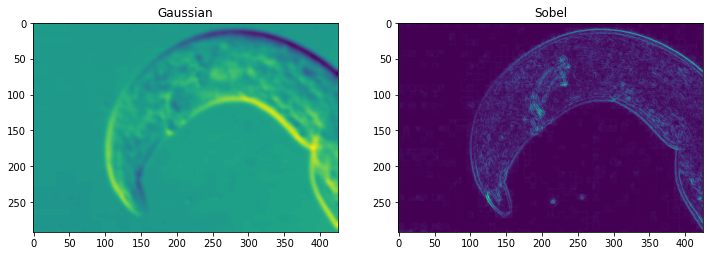

In [91]:
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

entropy_img = entropy(img, disk(1))

entropy1 = entropy_img.reshape(-1)
df['Entropy'] = entropy1
gaussian_img = nd.gaussian_filter(img, sigma=3)

gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian'] = gaussian_img1


from skimage.filters import sobel
sobel_img = sobel(img)

sobel1 = sobel_img.reshape(-1)
df['Sobel'] = sobel1

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(gaussian_img)
plt.title('Gaussian')
plt.subplot(122)
plt.imshow(sobel_img)
plt.title('Sobel')

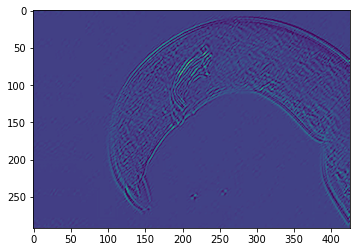

In [92]:
import numpy as np

kernel = cv2.getGaborKernel((5, 5), 5, 1*np.pi/4, 4*np.pi /4, 0.1, 0, ktype=cv2.CV_32F)

plt.imshow(kernel)

Gabor_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)

Gabor_img1 = Gabor_img.reshape(-1)
df['Gabor'] = Gabor_img1

plt.imshow(Gabor_img)


In [93]:
print(df.head())

   Original Image   Entropy  Gaussian     Sobel  Gabor
0             108  0.918296       102  0.008319     44
1             108  0.811278       102  0.008319     44
2             108  0.811278       102  0.008319     44
3             108  0.811278       102  0.008319     44
4             108  0.811278       102  0.008319     44
